In [ ]:
import random
from collections import deque, namedtuple
import IPython

Edge = tuple
Tree = set

def edge(A, B) -> Edge: return Edge(sorted([A, B]))

def random_tree(nodes, neighbors, pop=deque.pop) -> Tree:
    """Repeat: pop a node and add edge(node, nbr) until all nodes have been added to tree."""
    tree = Tree()
    nodes = set(nodes)
    root = nodes.pop()
    frontier = deque([root])
    while nodes:
        node = pop(frontier)
        nbrs = neighbors(node) & nodes
        if nbrs:
            nbr = random.choice(list(nbrs))
            tree.add(edge(node, nbr))
            nodes.remove(nbr)
            frontier.extend([node, nbr])
    return tree

In [ ]:
class Player: #position of 9, 9 signifies the end
    def __init__(self, maze, start_position=(0, 0)):
        self.maze = maze
        self.position = start_position

    def move(self, new_position):
        if new_position in neighbors4(self.position):
            self.position = new_position

    def move2(self, new_position):
        if new_position in neighbors4(self.position):
            # Check if the new position is within the maze boundaries
            if 0 <= new_position[0] < self.maze.width and 0 <= new_position[1] < self.maze.height:
                # Check if there's a wall between the current and new positions
                if edge(self.position, new_position) in self.maze.edges:
                    self.position = new_position

    def plot(self):
        x, y = self.position
        plt.plot(x + 0.5, y + 0.5, 'bo', markersize=10)  # Blue circle

In [ ]:
Maze = namedtuple('Maze', 'width, height, edges')

Square = tuple

def neighbors4(square) -> {Square}:
    """The 4 neighbors of an (x, y) square."""
    (x, y) = square
    return {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}

def grid(width, height) -> {Square}:
    """All squares in a grid of these dimensions."""
    return {(x, y) for x in range(width) for y in range(height)}

def random_maze(width, height, pop=deque.pop) -> Maze:
    """Generate a random maze, using random_tree."""
    tree = random_tree(grid(width, height), neighbors4, pop)
    return Maze(width, height, tree)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_maze(maze, figsize=None, path=None):
    """Plot a maze by drawing lines between adjacent squares, except for pairs in maze.edges"""
    w, h  = maze.width, maze.height
    plt.figure(figsize=figsize or (w/5, h/5))
    plt.axis('off')
    plt.gca().invert_yaxis()
    exits = {edge((0, 0), (0, -1)), edge((w-1, h-1), (w-1, h))}
    edges = maze.edges | exits
    for sq in grid(w, h):
        for nbr in neighbors4(sq):
            if edge(sq, nbr) not in edges:
                plot_wall(sq, nbr)
    if path: # Plot the solution (or any path) as a red line through the maze
        X, Y = transpose((x + 0.5, y + 0.5) for (x, y) in path)
        plt.plot(X, Y, 'r-', linewidth=2)

def transpose(matrix): return list(zip(*matrix))

def plot_wall(s1, s2):
    """Plot a wall: a black line between squares s1 and s2."""
    (x1, y1), (x2, y2) = s1, s2
    if x1 == x2: # horizontal wall
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else: # vertical wall
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'k-', linewidth=2)

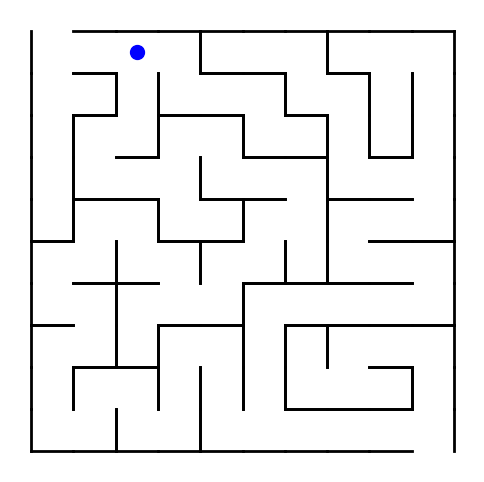

In [ ]:
M = random_maze(10, 10)
player = Player(M)

while True:
    plot_maze(M, figsize=(6, 6))
    player.plot()
    #print(player.position)
    plt.show()

    move = input(":")

    if move.lower() == 'q':
        break

    current_x, current_y = player.position
    new_position = player.position

    if move.lower() == 'r':
        new_position = (current_x + 1, current_y)
    elif move.lower() == 'l':
        new_position = (current_x - 1, current_y)
    elif move.lower() == 'u':
        new_position = (current_x, current_y - 1)
    elif move.lower() == 'd':
        new_position = (current_x, current_y + 1)
    else:
        print("Invalid move.")
        continue

    player.move2(new_position)
    IPython.display.clear_output(wait=True)
